In [3]:
from utils import prepare_jupyter
prepare_jupyter()

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from data import BINARY_CLASS_SETS
from thesis.io import NAMES, read_csv

# BASE_DIR = '/Users/tomek/University/MgrThesis/EnsembleDiversityResults/experiments-10-08'
# BASE_DIR = '/Users/tomek/University/MgrThesis/EnsembleDiversityResults/diversity-21-09'

## Ranking

In [4]:
BASE_DIR = '/Users/tomek/University/MgrThesis/EnsembleDiversityResults/rank-08-09'
dfs = [(name, read_csv(BASE_DIR, name)) for name in NAMES]
dataset_names = [name for (name, _) in BINARY_CLASS_SETS]

results = {}

for estimator_name, df in dfs:
    for (n, dataset_name), group in df.groupby(['n_estimators', 'dataset_name']):
        acc = group['accuracy']
        best_acc = acc.max()
        
        estimator_id = f'{estimator_name}_{n}'
        
        if dataset_name not in results:
            results[dataset_name] = {}
            
        results[dataset_name][estimator_id] = best_acc
        
results = pd.DataFrame(results).transpose()
ranked_results = results.rank(ascending=1, axis=1, method='dense')
ranked_results

,adaboost_10,adaboost_100,adaboost_50,bagging_10,bagging_100,bagging_50,catboost_10,catboost_100,catboost_50,lgb_10,lgb_100,lgb_50,randomforest_10,randomforest_100,randomforest_50,xgboost_10,xgboost_100,xgboost_50
SPECT,6.0,6.0,6.0,2.0,1.0,1.0,6.0,5.0,5.0,5.0,4.0,3.0,2.0,2.0,1.0,1.0,4.0,4.0
boston,2.0,5.0,5.0,6.0,4.0,6.0,6.0,3.0,9.0,1.0,3.0,3.0,8.0,7.0,8.0,3.0,2.0,2.0
cmc,1.0,2.0,2.0,13.0,10.0,11.0,2.0,3.0,4.0,8.0,5.0,6.0,12.0,11.0,12.0,9.0,7.0,8.0
flags,4.0,4.0,3.0,4.0,3.0,4.0,7.0,4.0,4.0,1.0,1.0,2.0,6.0,4.0,5.0,2.0,3.0,3.0
glass,6.0,5.0,5.0,4.0,2.0,2.0,2.0,7.0,4.0,2.0,3.0,3.0,4.0,6.0,4.0,1.0,2.0,2.0
ionosphere,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0
isolet,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0
lymph,6.0,5.0,6.0,5.0,3.0,3.0,2.0,6.0,5.0,1.0,3.0,2.0,4.0,5.0,5.0,2.0,3.0,3.0
oil_spill,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
pollution,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,3.0,1.0,3.0,3.0,4.0,4.0,4.0,1.0,3.0,3.0


In [5]:
ranked_results.sum(axis=0)

adaboost_10         59.0
adaboost_100        66.0
adaboost_50         64.0
bagging_10          74.0
bagging_100         56.0
bagging_50          66.0
catboost_10         70.0
catboost_100        66.0
catboost_50         75.0
lgb_10              44.0
lgb_100             66.0
lgb_50              54.0
randomforest_10     75.0
randomforest_100    70.0
randomforest_50     70.0
xgboost_10          41.0
xgboost_100         60.0
xgboost_50          56.0
dtype: float64

## Wielkość drzew

In [27]:
base_dir = '/Users/tomek/University/MgrThesis/EnsembleDiversityResults/diversity-23-09'
dfs = [(name, read_csv(base_dir, name)) for name in NAMES]

def measure_per_set_plot(measure):
    num_dfs = len(dfs)
    fig, axes = plt.subplots(nrows=len(dfs) // 2, ncols=2, figsize=(20, 20), sharex=True, sharey=True)
    for ax, (df_name, df) in zip(axes.flat, dfs):
        num_nodes = df[measure]
        ax.set_title(df_name)
        num_nodes.hist(ax=ax, bins=100)

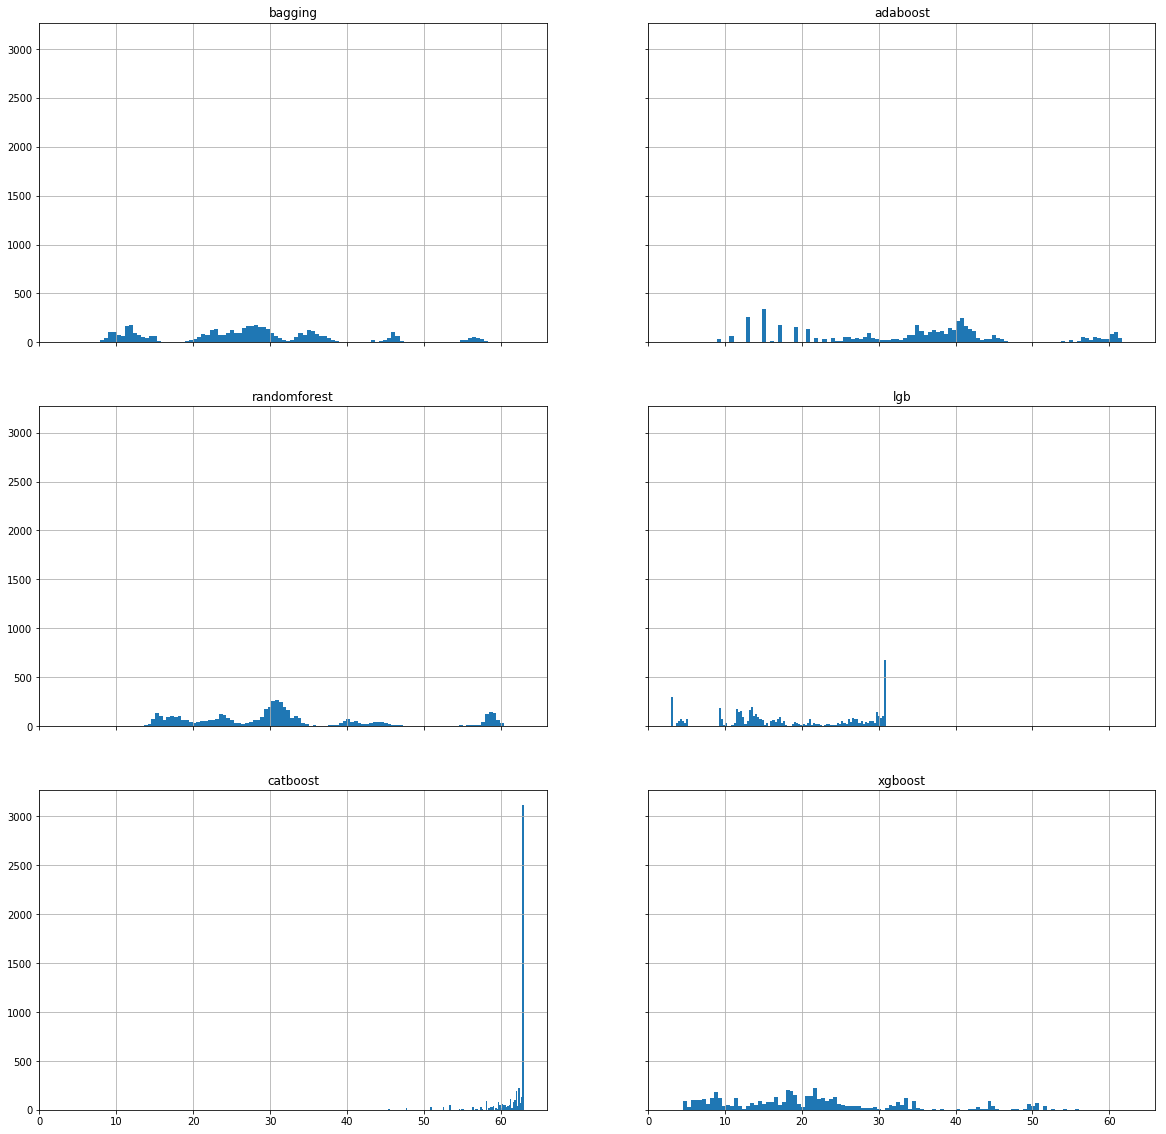

In [28]:
measure_per_set_plot('avg_node_count')

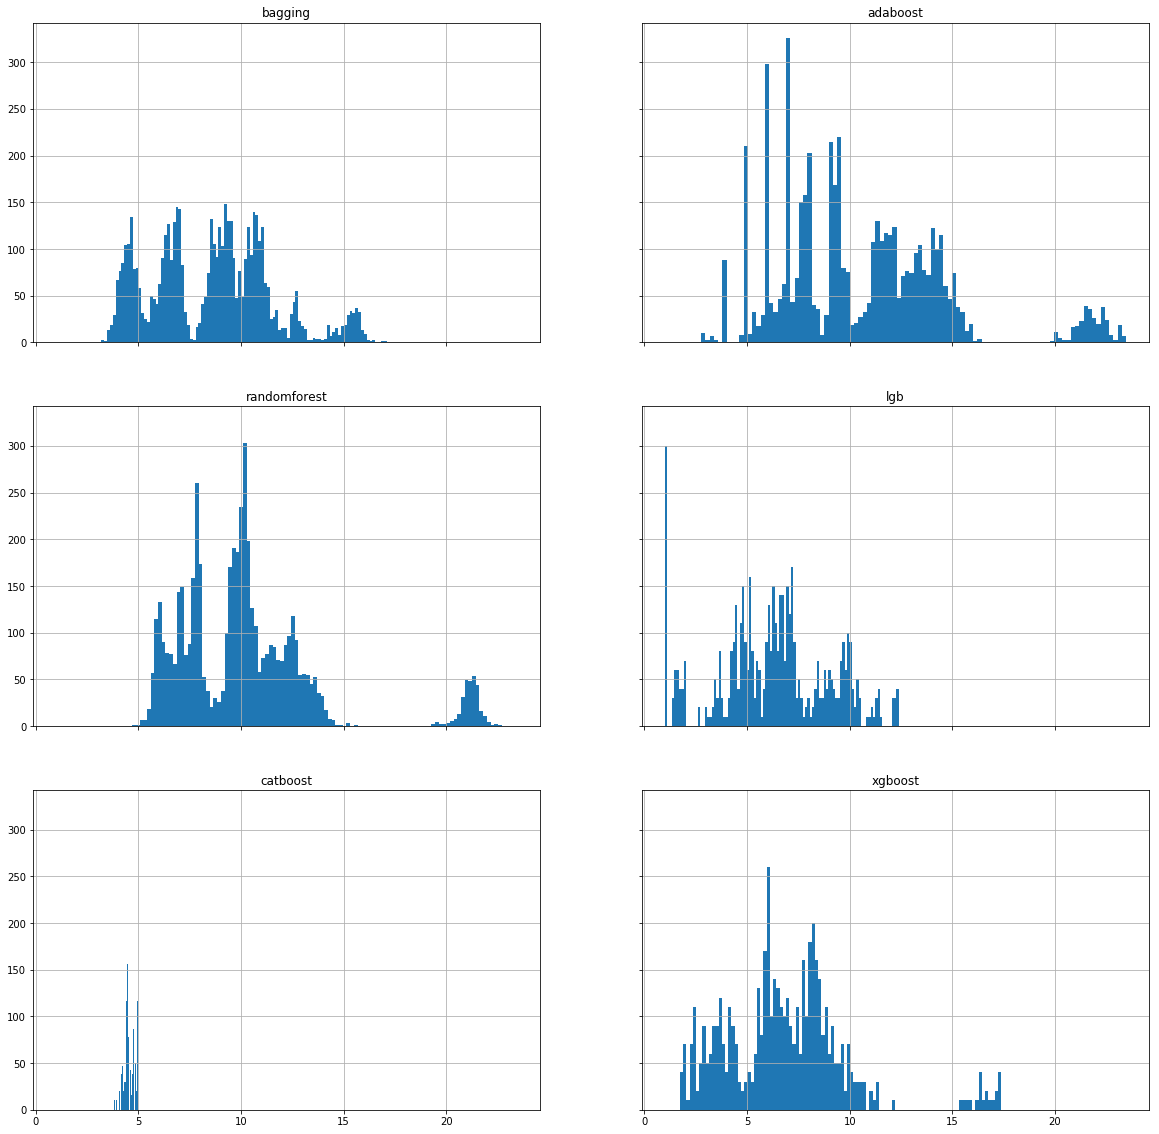

In [29]:
measure_per_set_plot('avg_attributes_used')

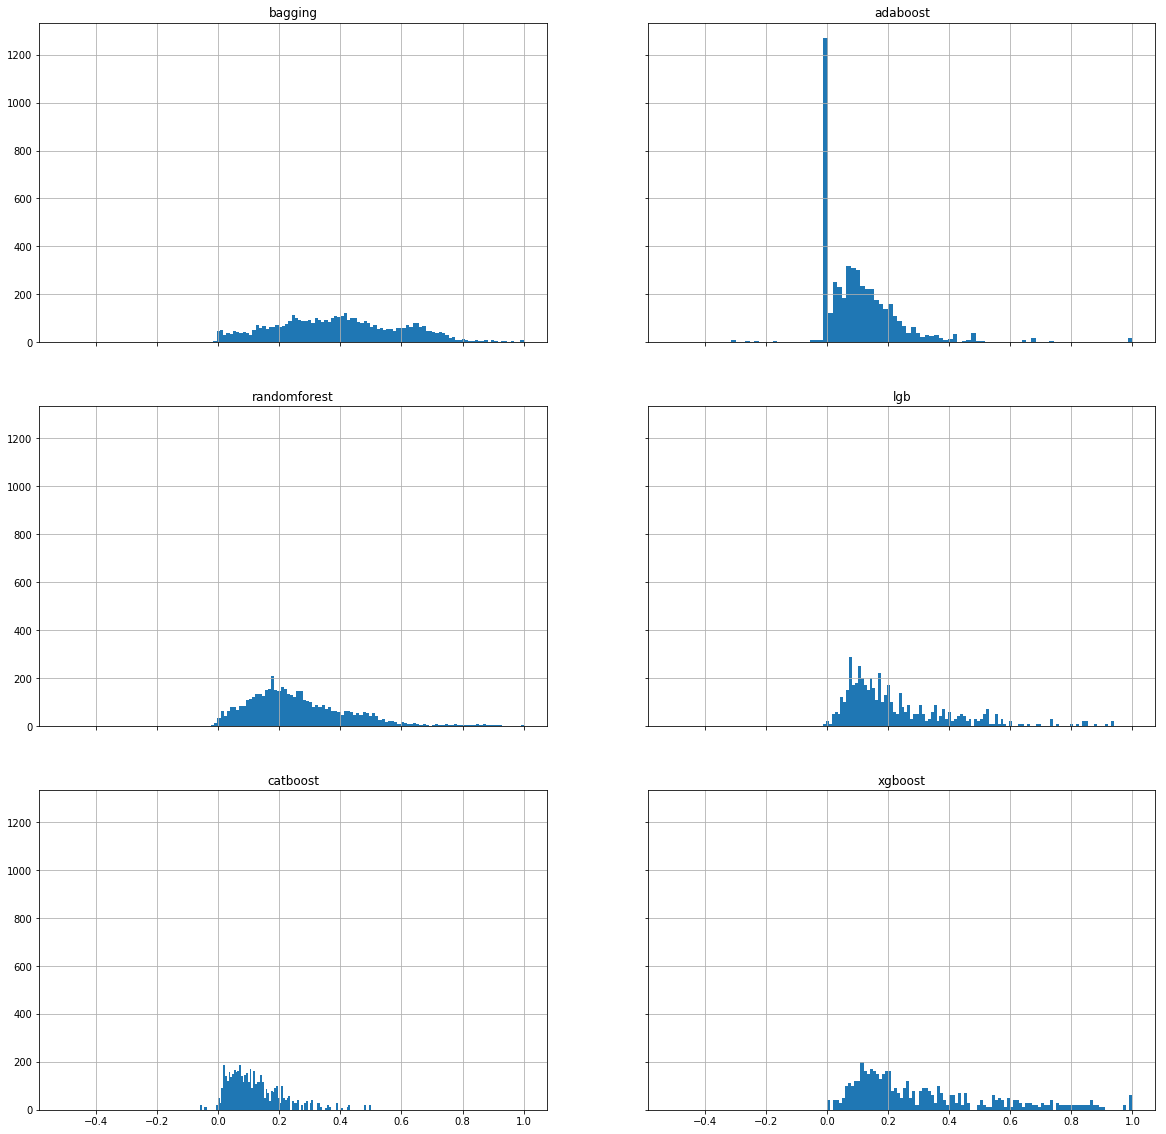

In [30]:
measure_per_set_plot('corr')

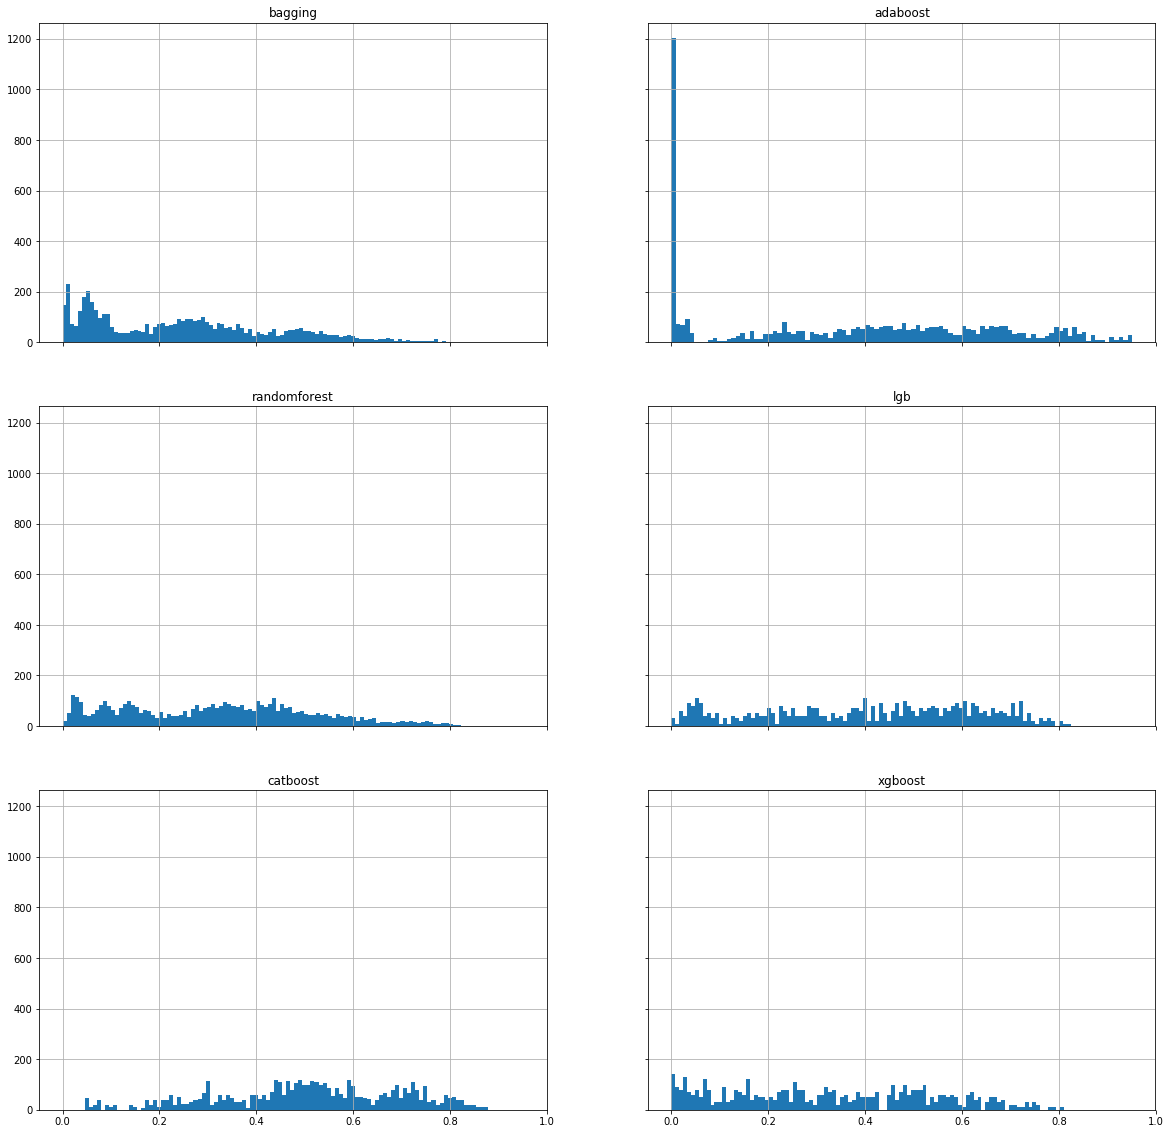

In [31]:
measure_per_set_plot('entropy')

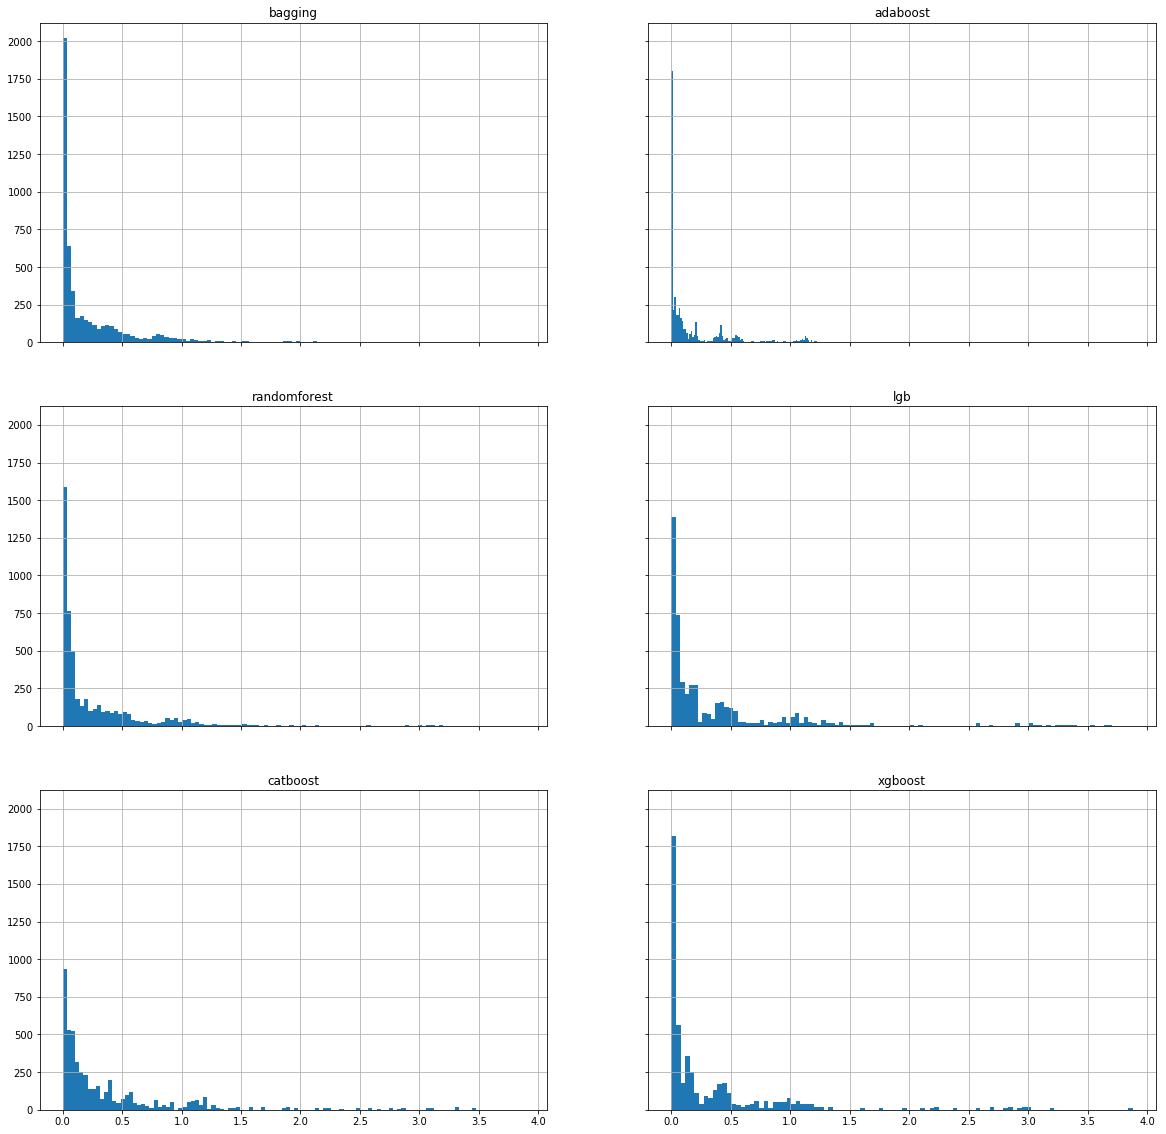

In [32]:
measure_per_set_plot('kw')

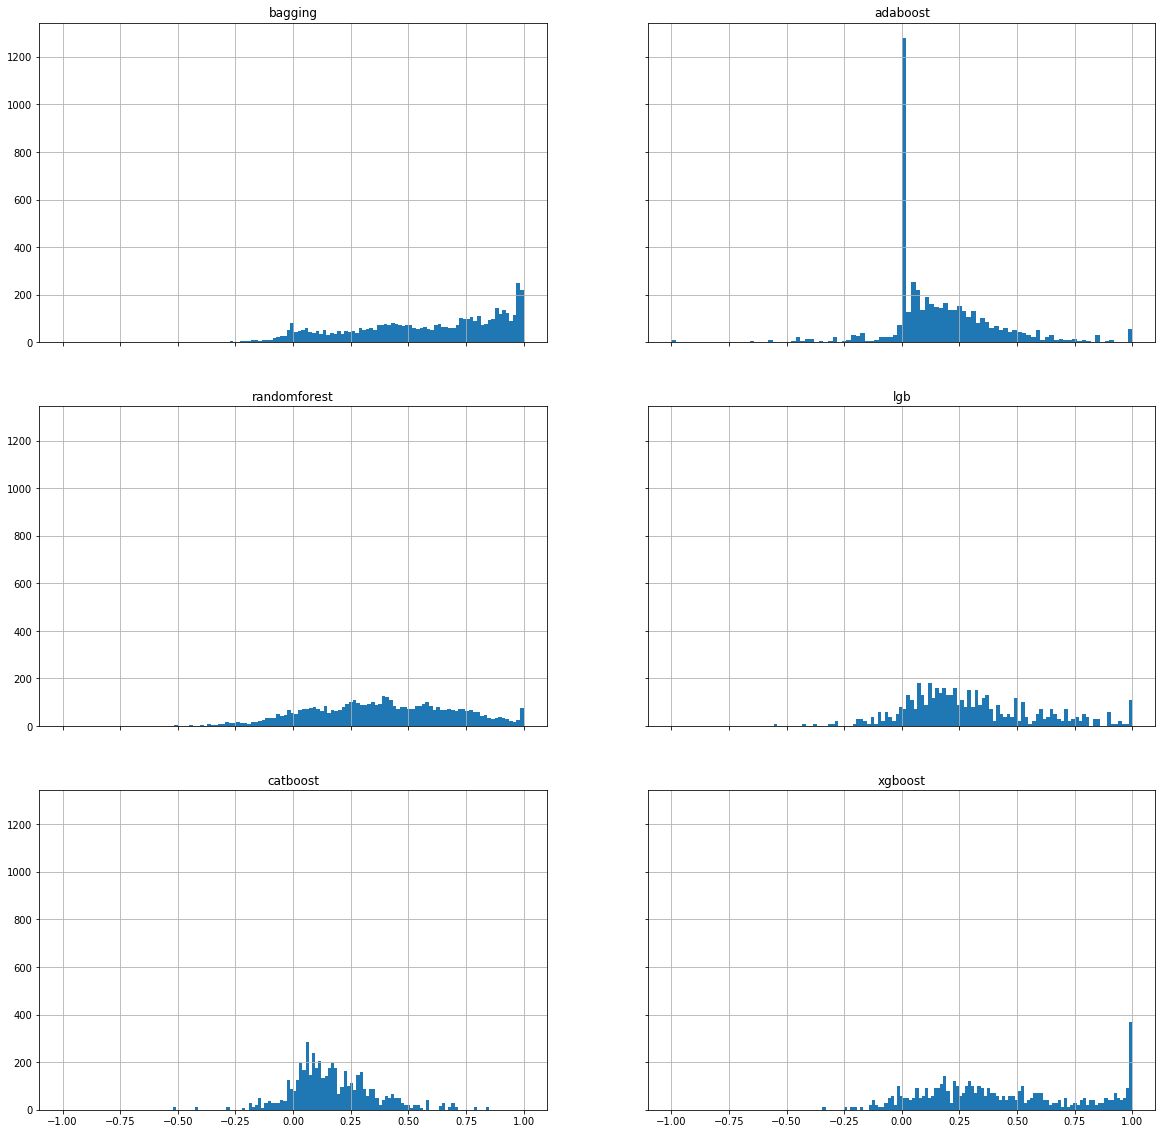

In [33]:
measure_per_set_plot('q')

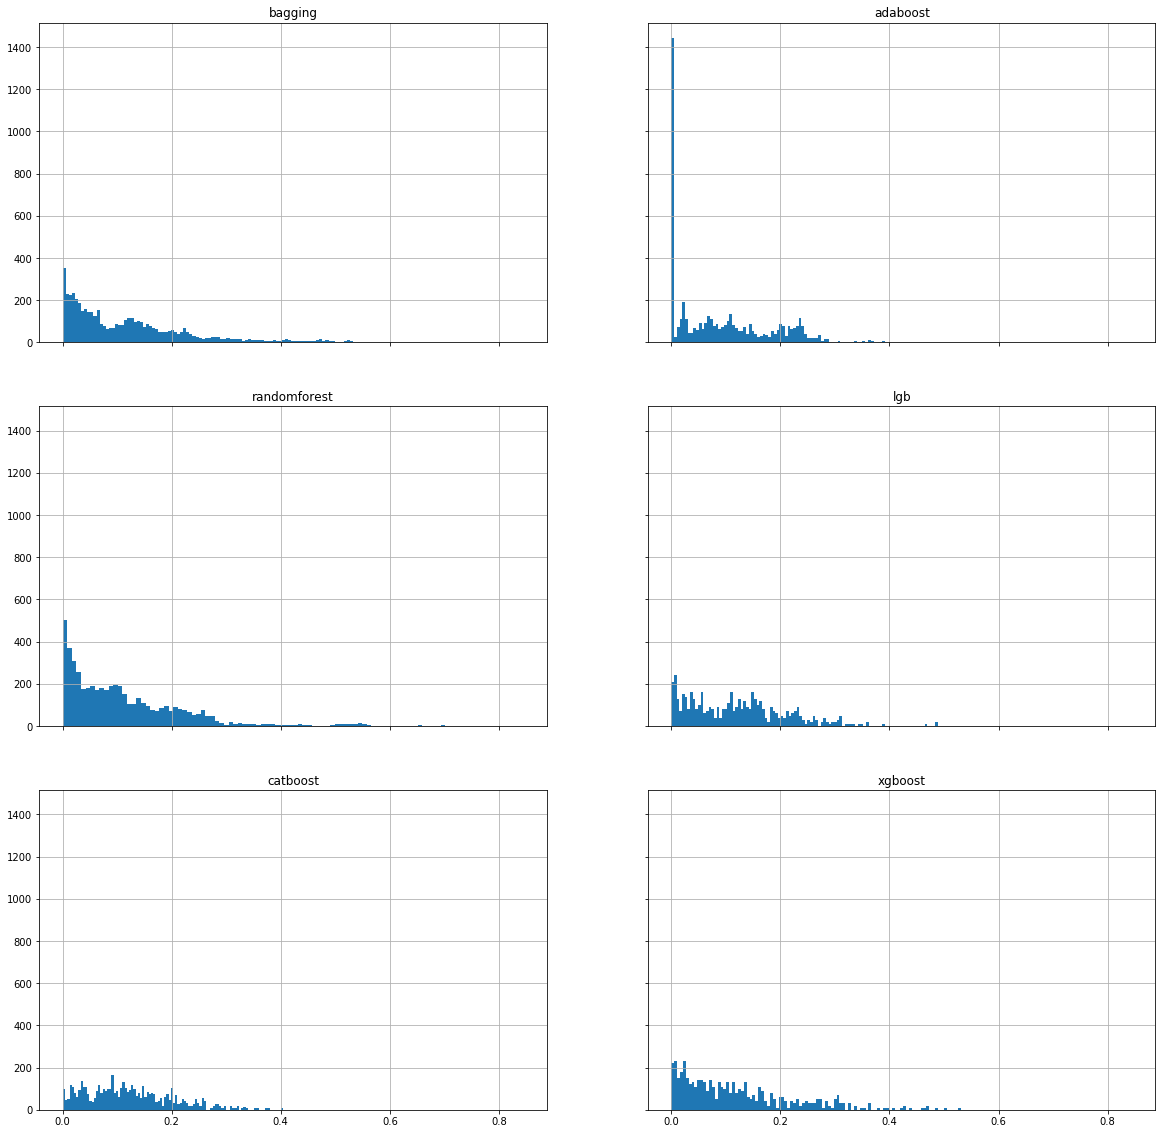

In [34]:
measure_per_set_plot('df')

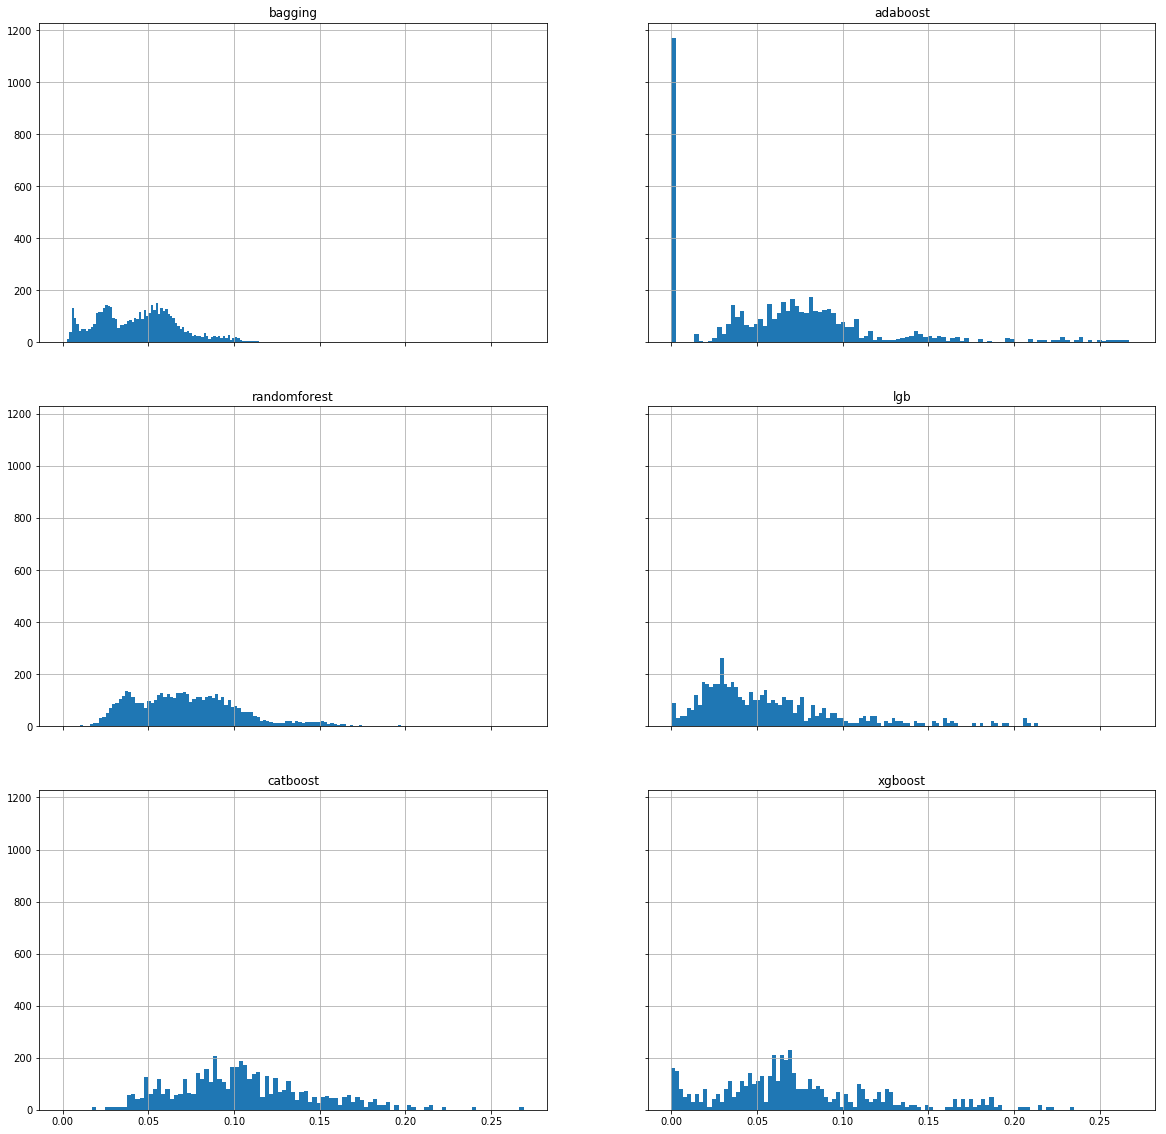

In [35]:
measure_per_set_plot('coverage_minmax')

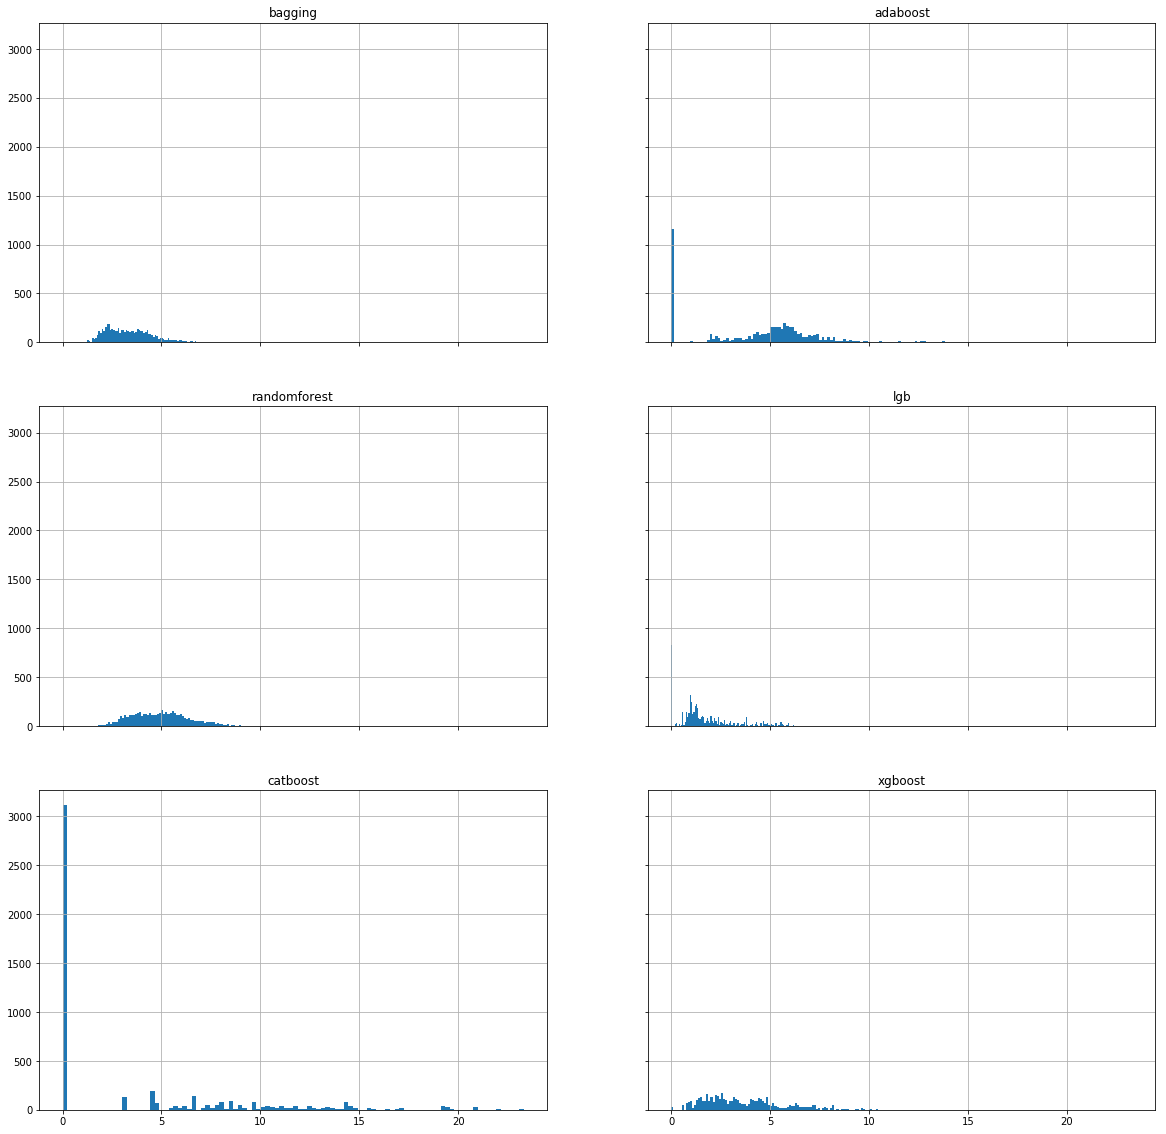

In [36]:
measure_per_set_plot('node_diversity')

## Liczba wykorzystanych atrybutów

Porównanie do średniej liczby wierzchołków w drzewie

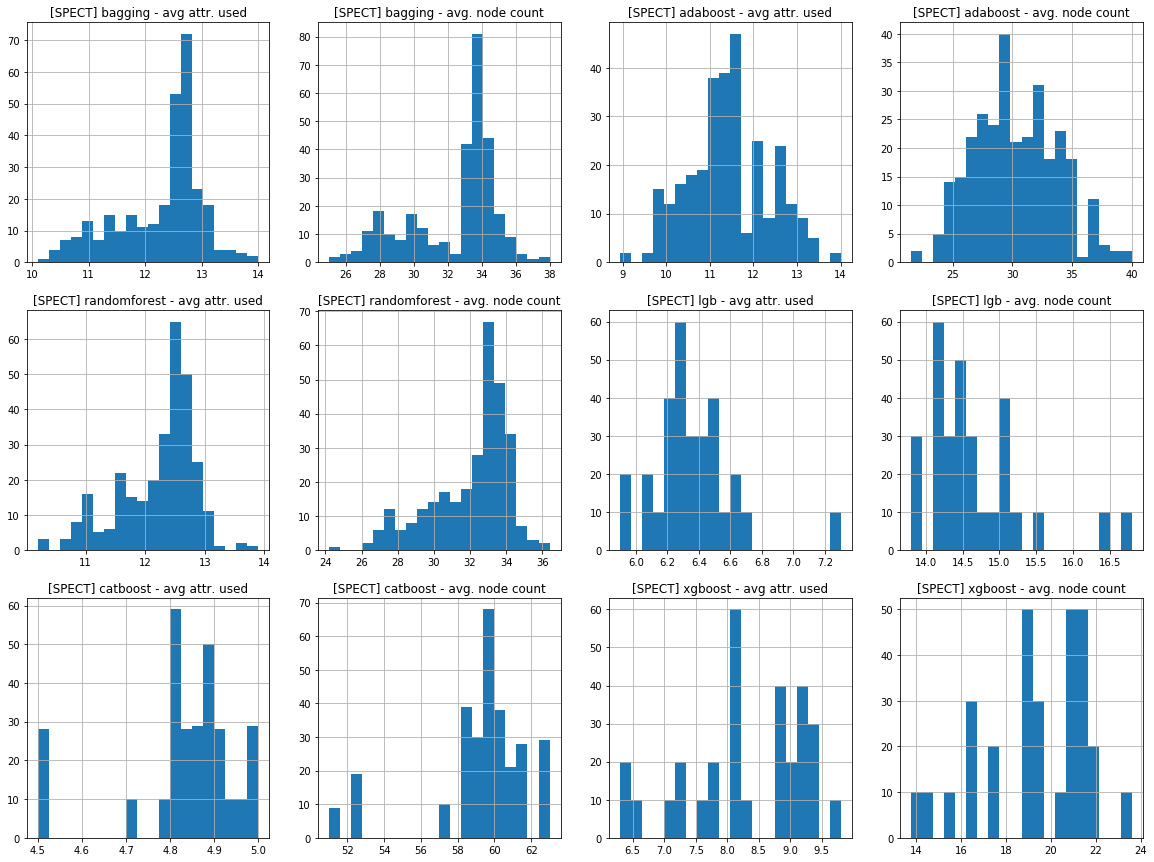

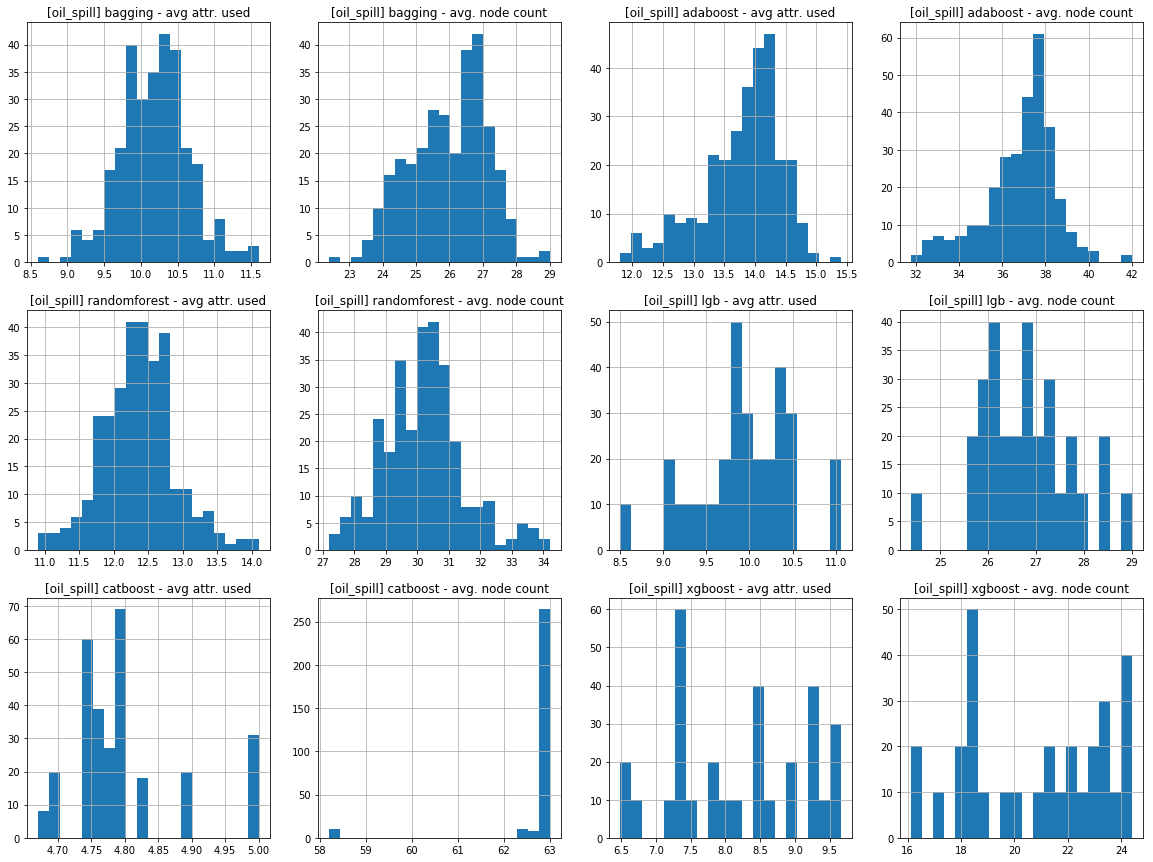

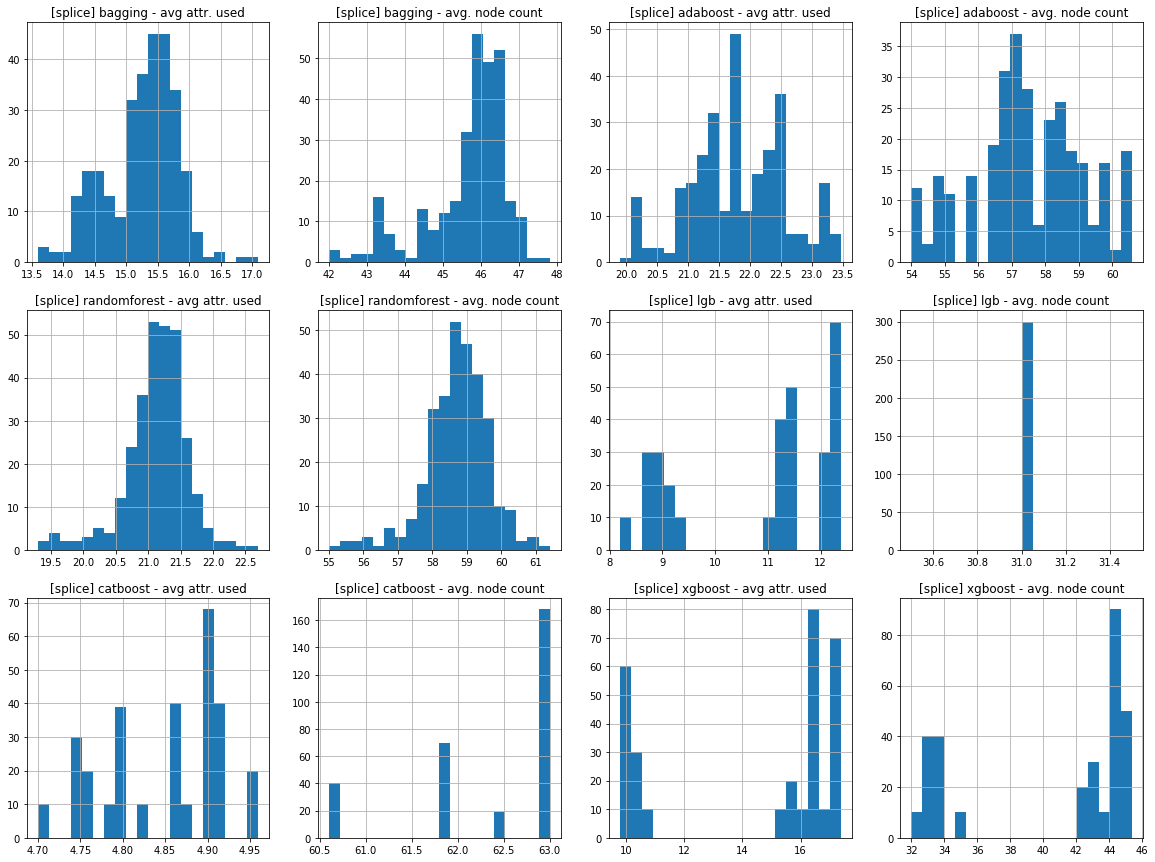

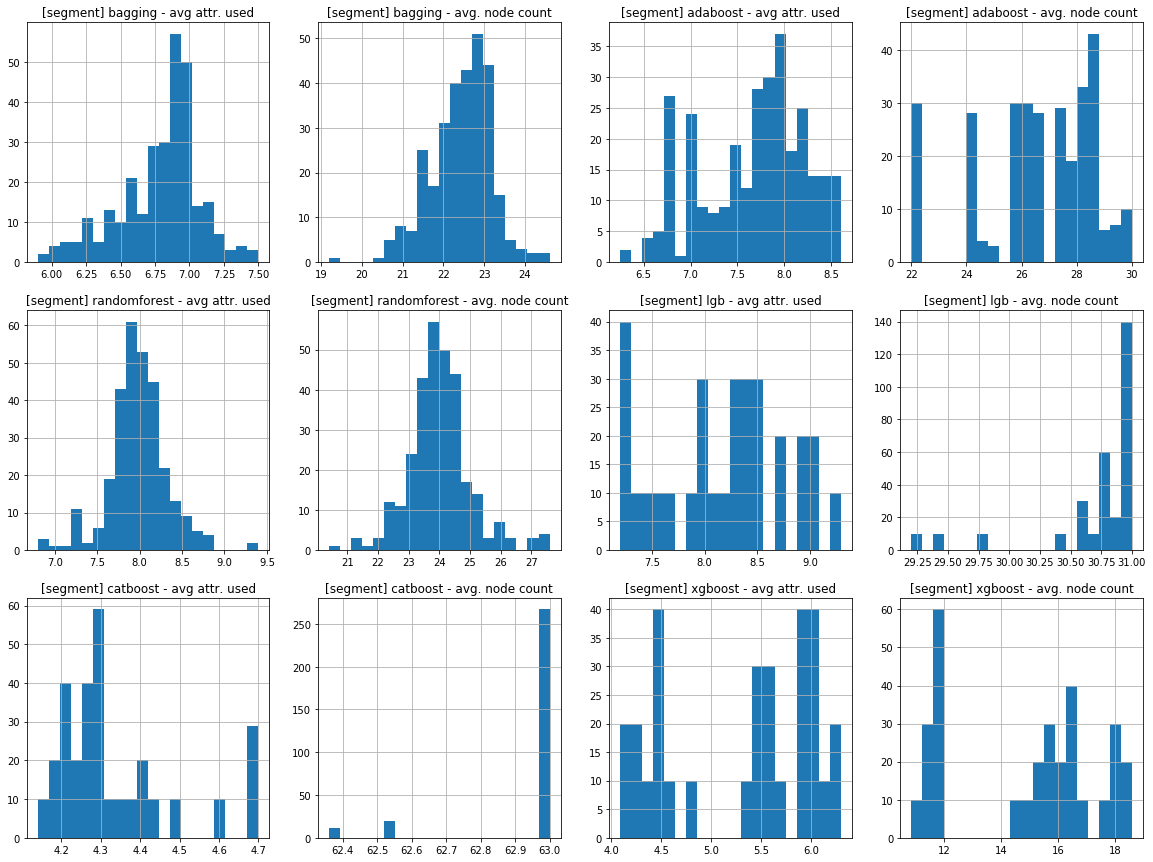

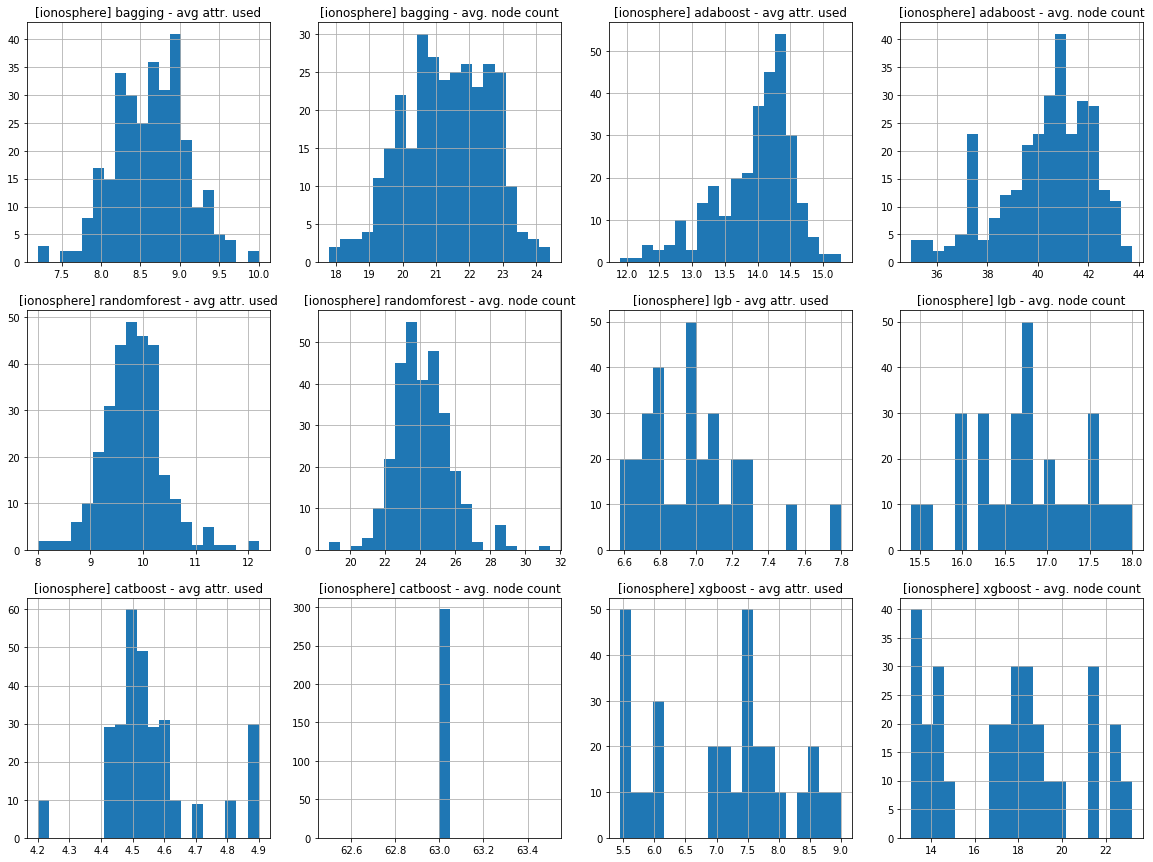

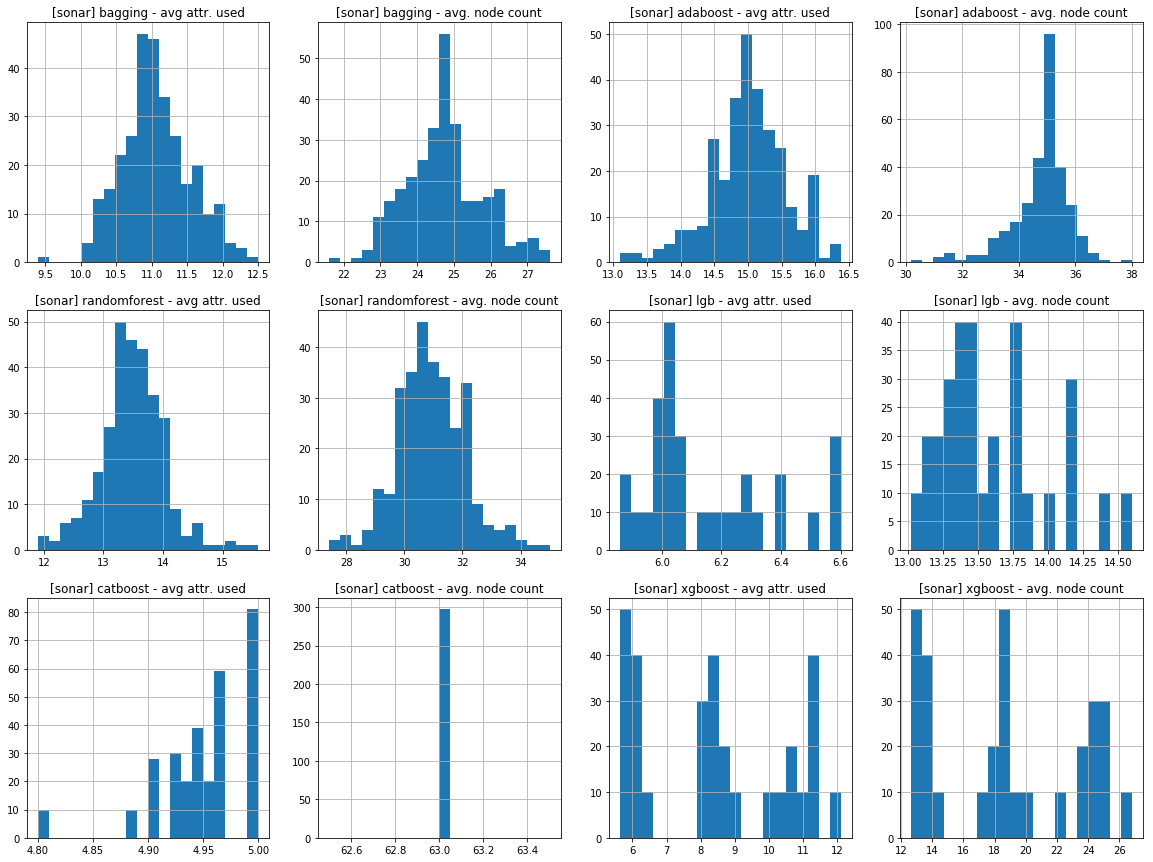

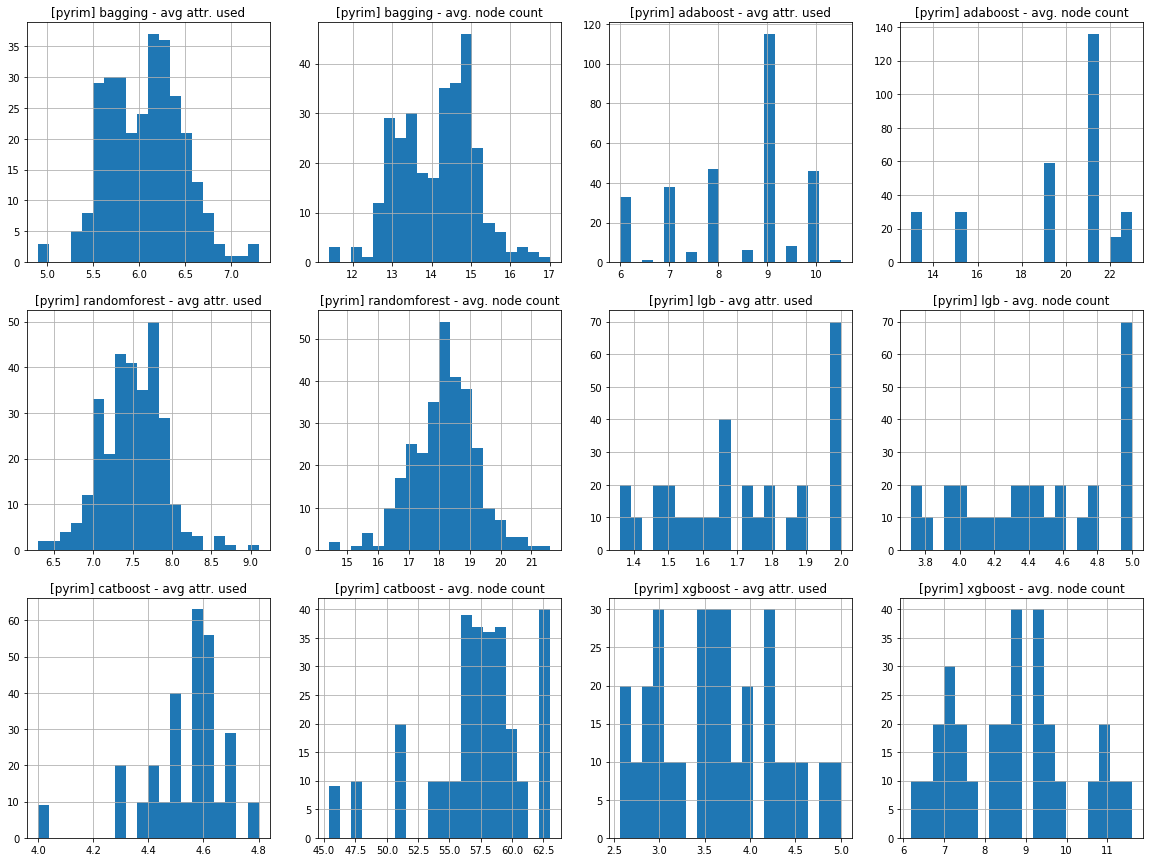

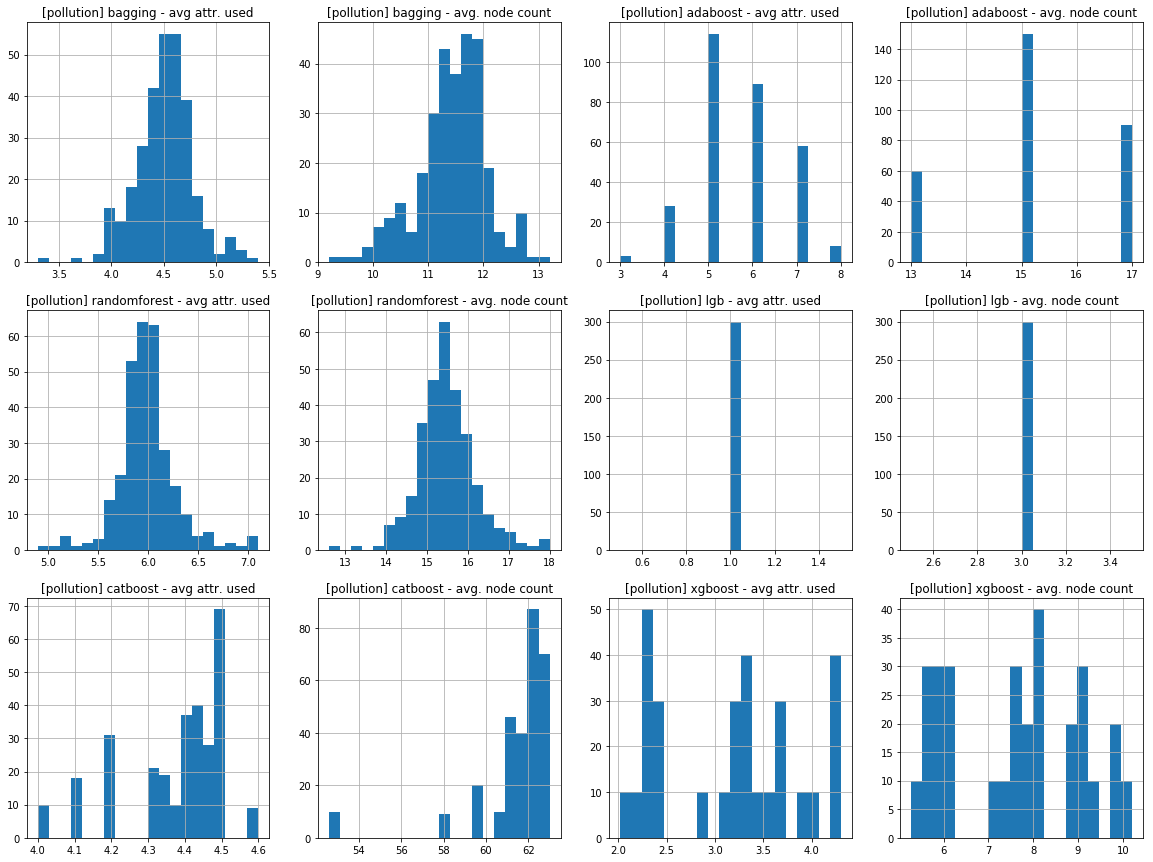

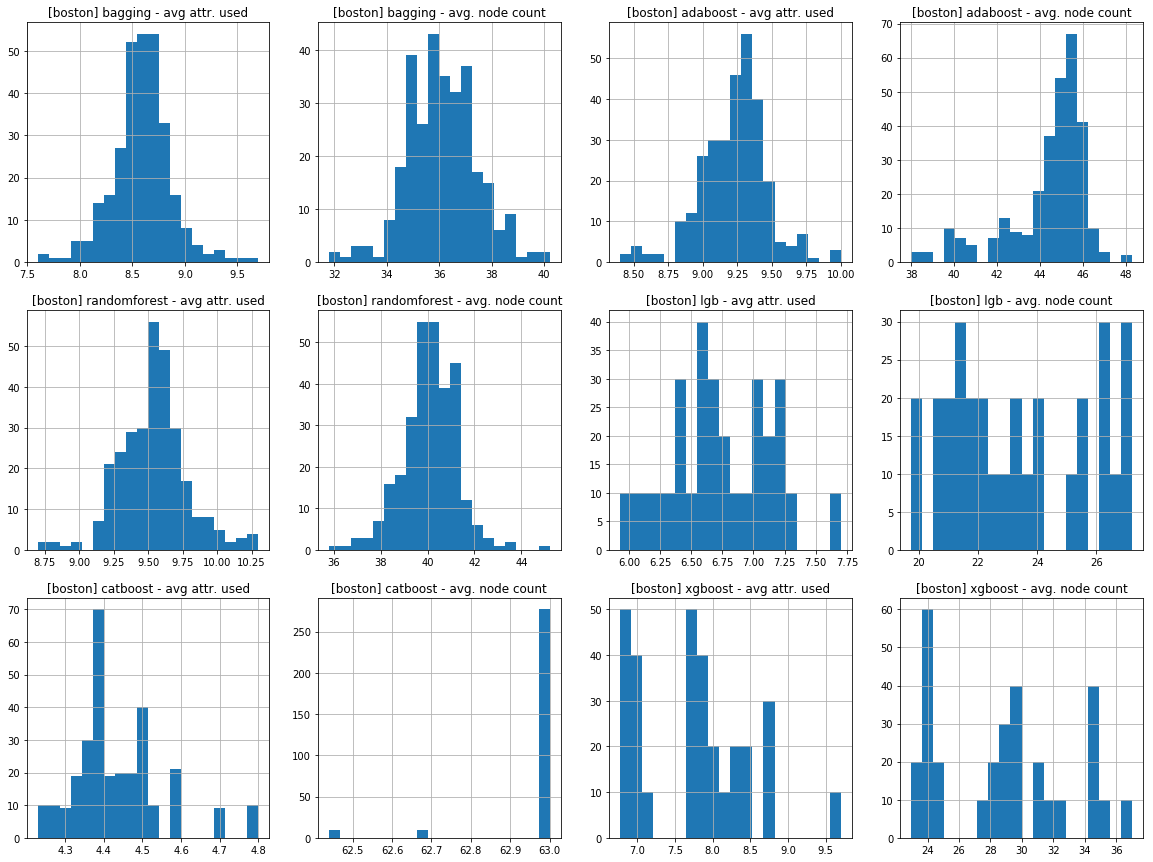

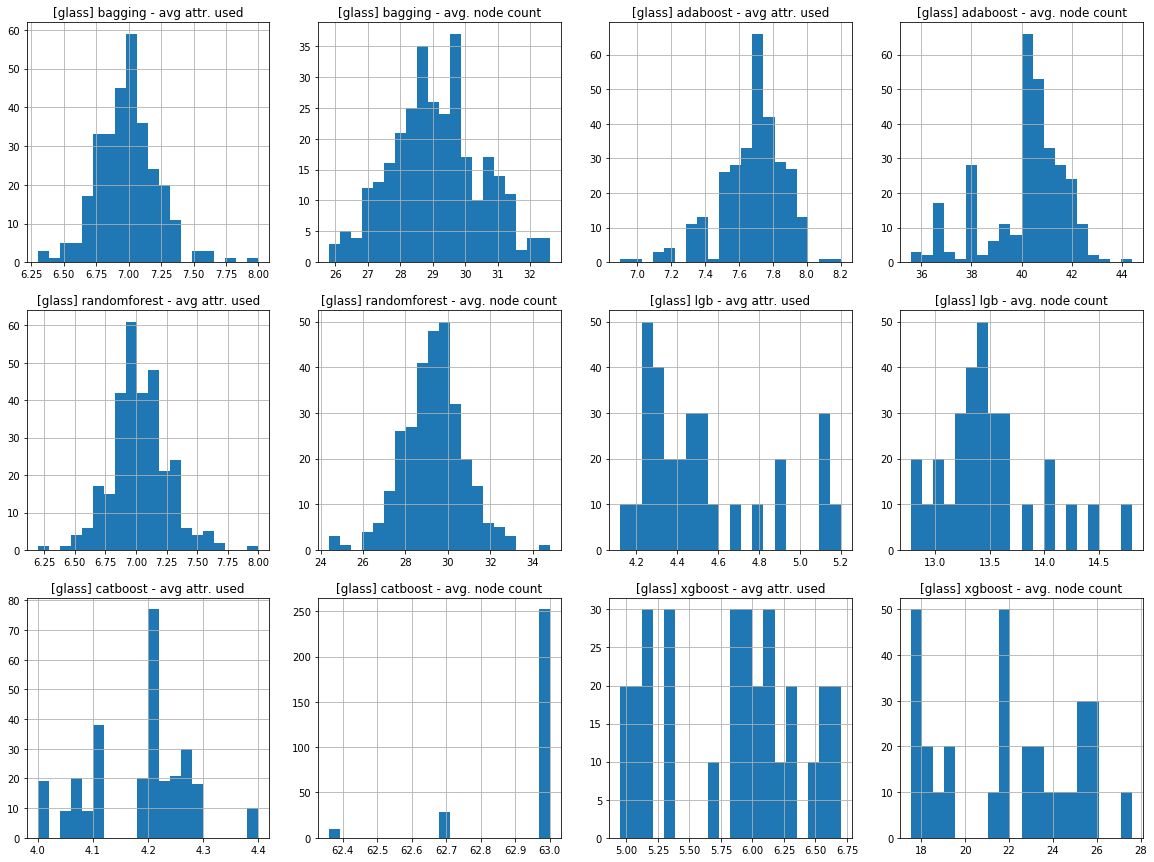

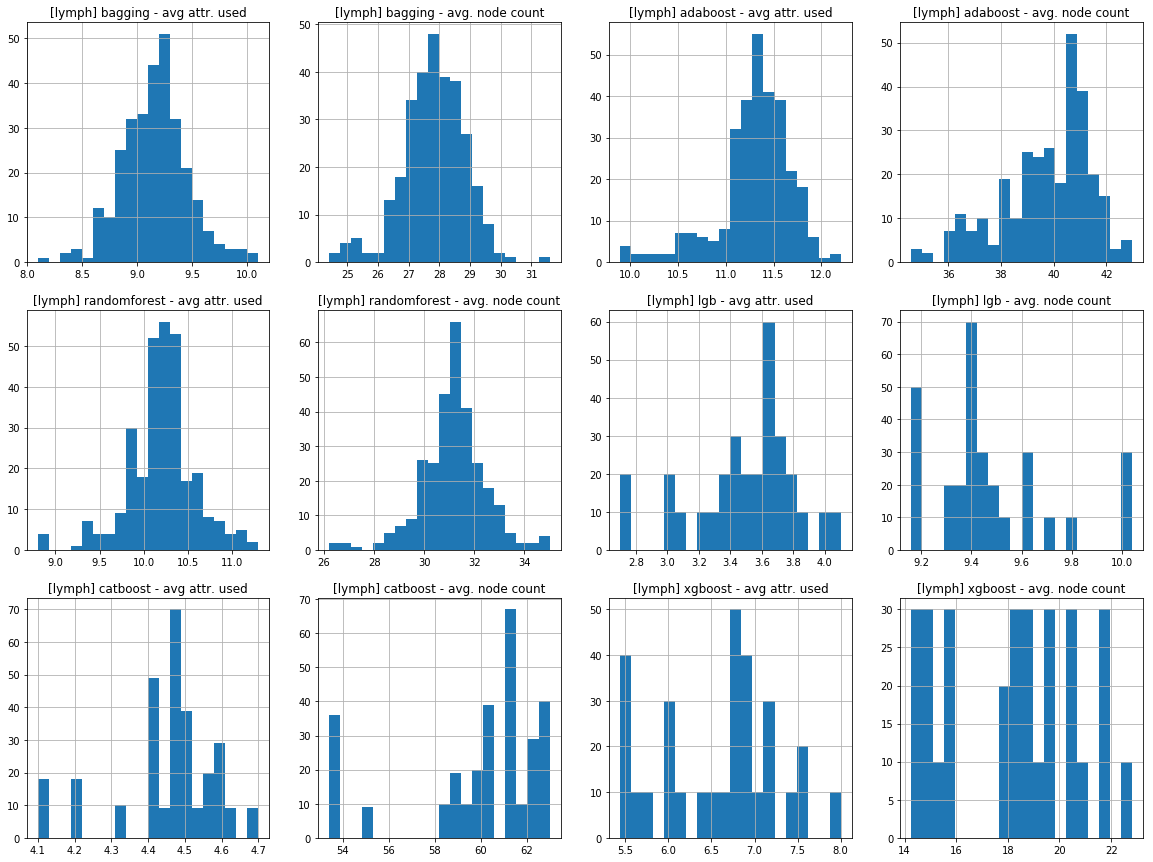

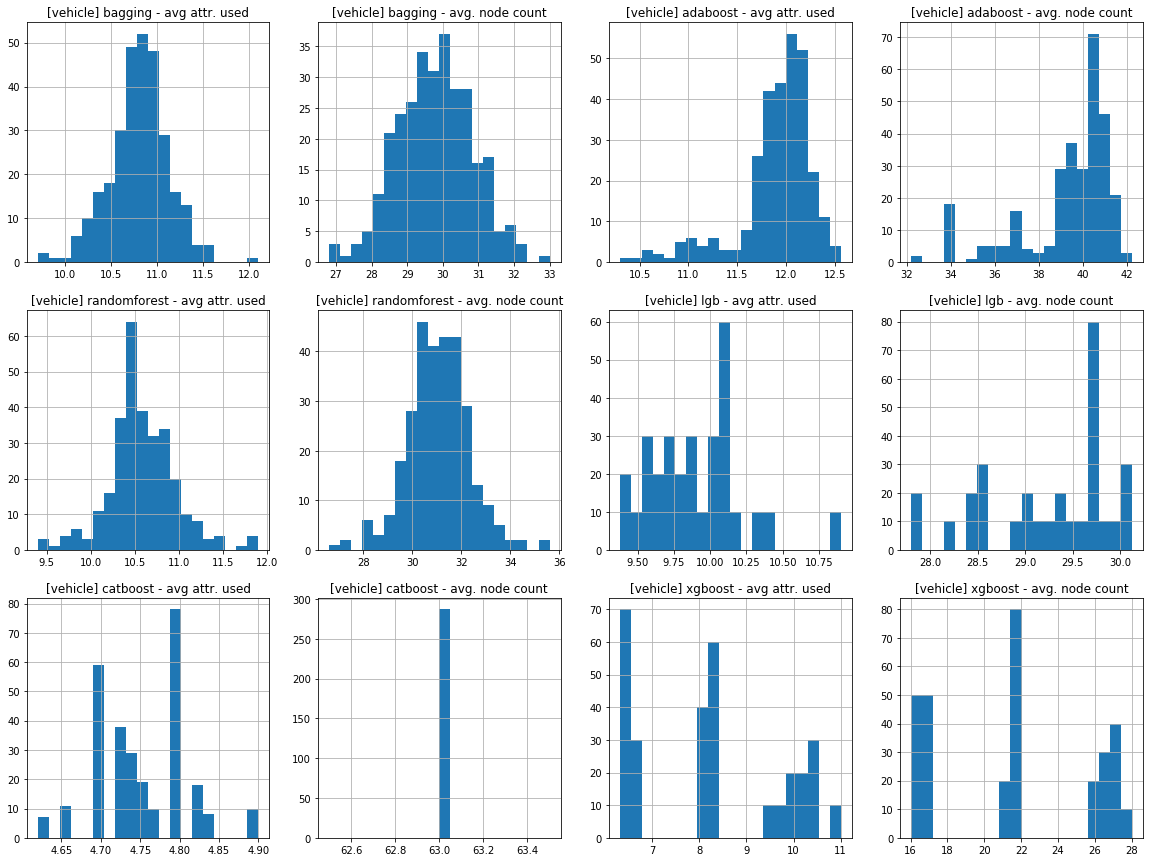

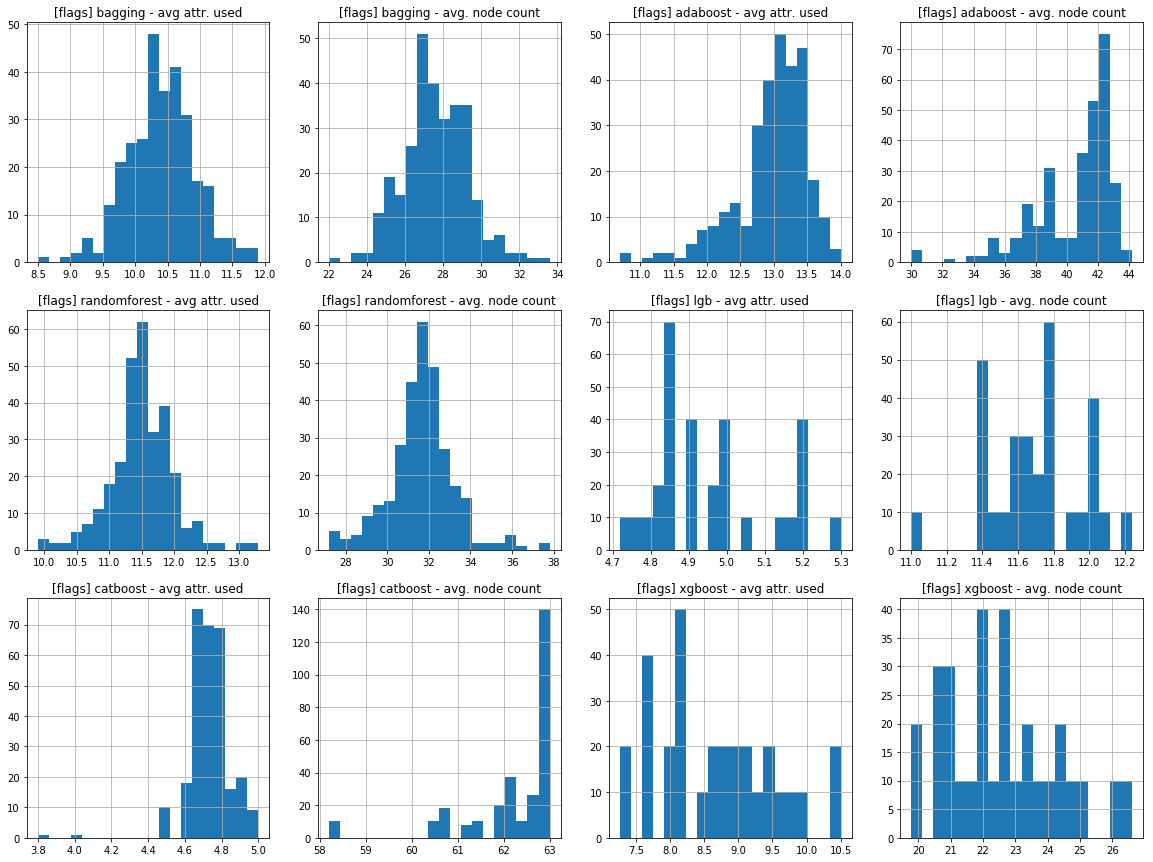

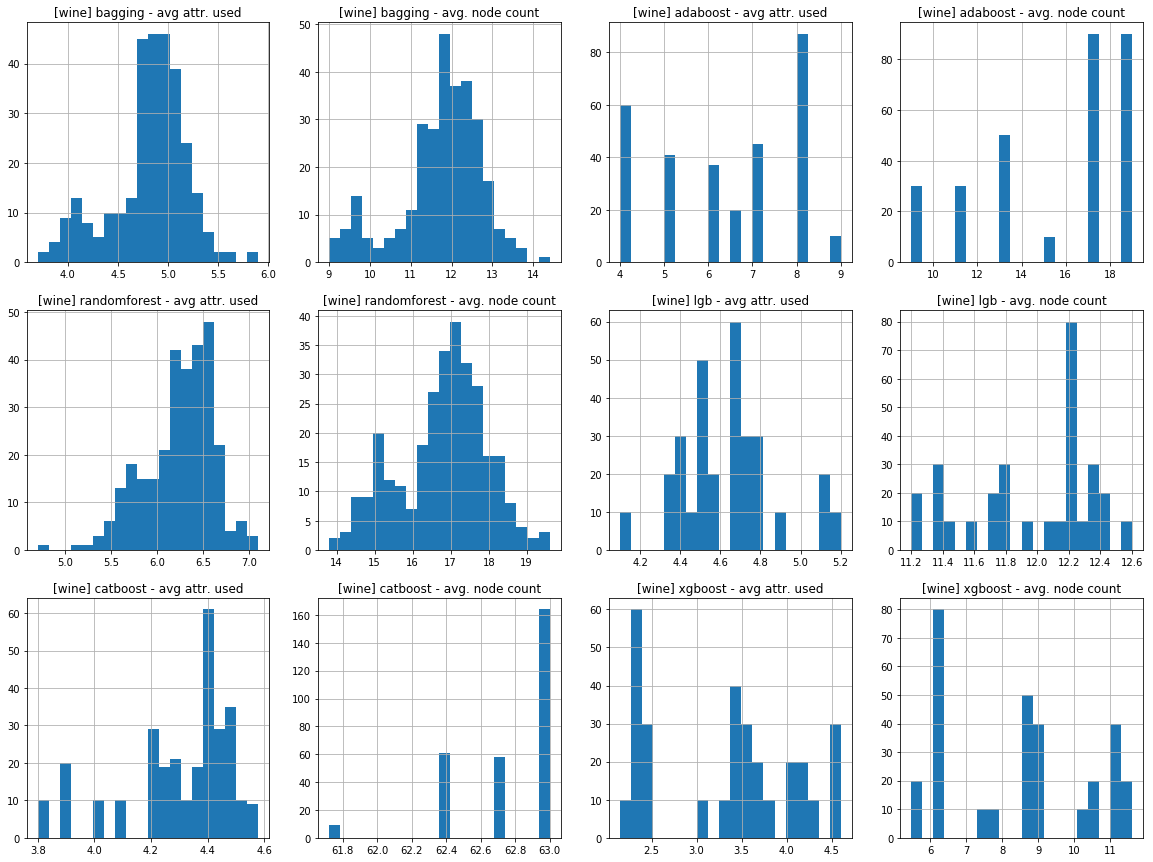

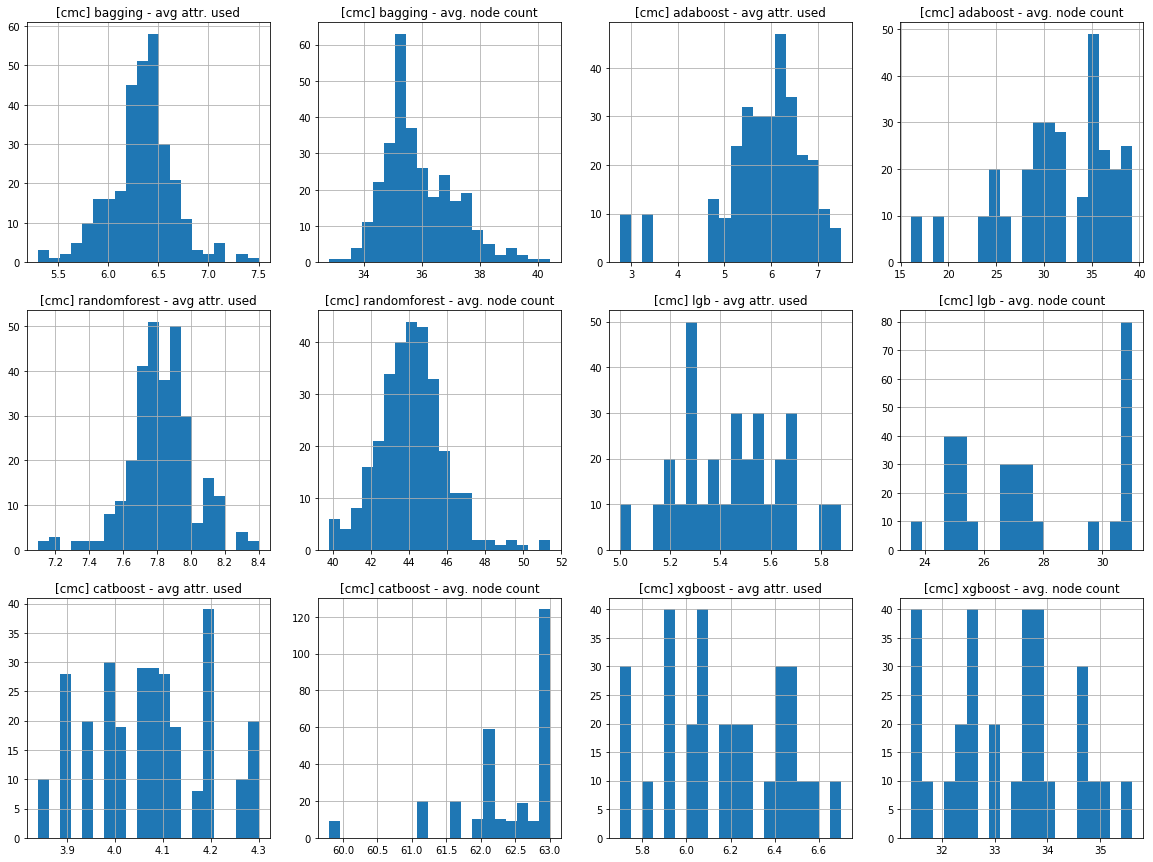

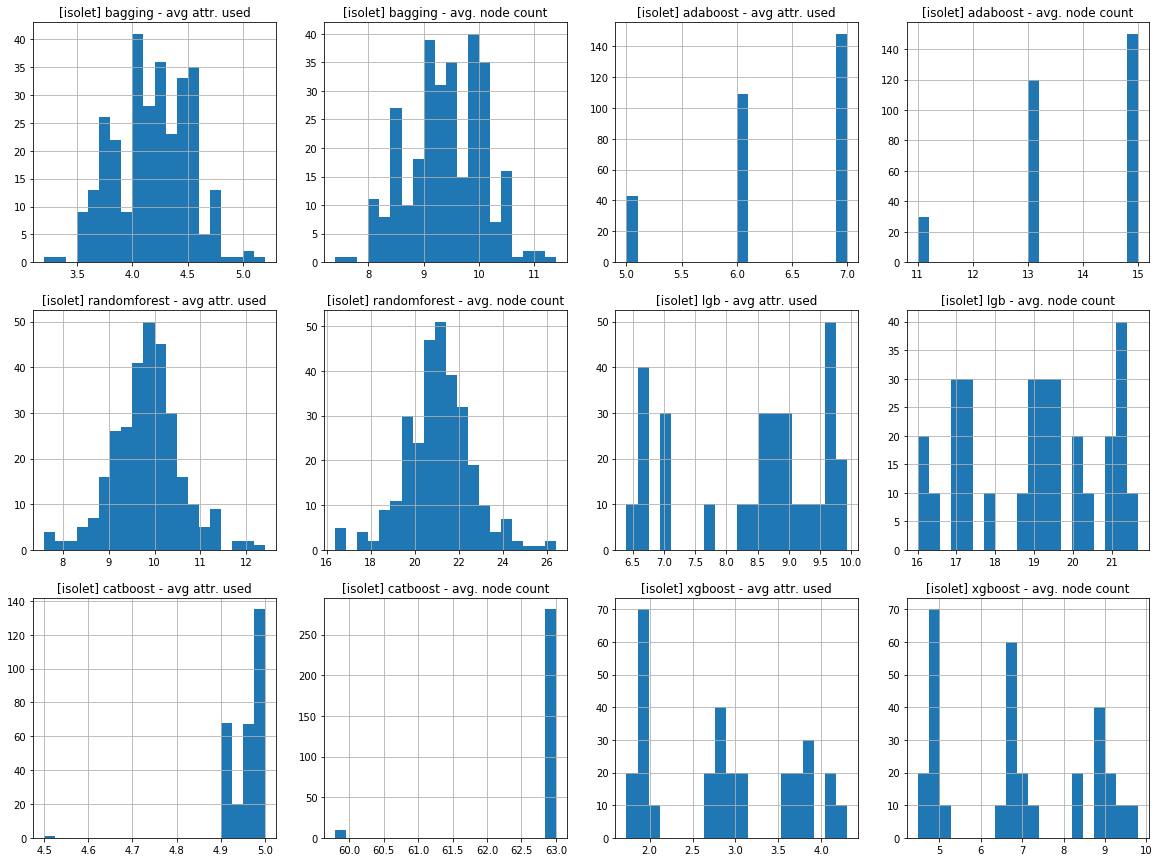

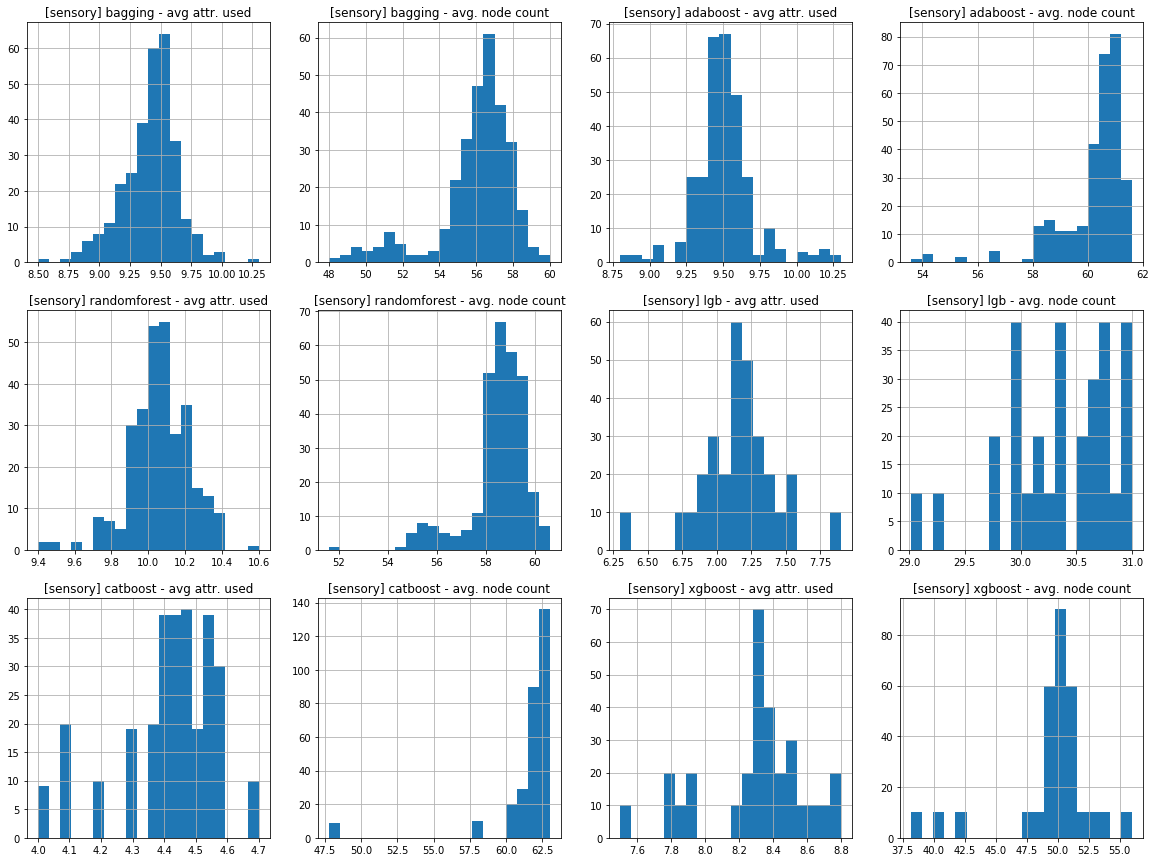

In [16]:
base_dir = '/Users/tomek/University/MgrThesis/EnsembleDiversityResults/diversity-23-09'
dfs = [(name, read_csv(base_dir, name)) for name in NAMES]

for (dataset_name, version) in BINARY_CLASS_SETS:
    fig, axes = plt.subplots(nrows=len(dfs) // 2, ncols=4, figsize=(20, 15))
    flat_axes = list(axes.flat)
    axes = [[flat_axes[i*2], flat_axes[i*2 + 1]] for i in range(len(flat_axes) // 2)]

    for (ax_left, ax_right), data in zip(axes, dfs):
        title, df = data

        df = df[df['dataset_name'] == dataset_name]
        attributes_count = df['avg_attributes_used']
        ax_left.set_title(f'[{dataset_name}] {title} - avg attr. used')
        attributes_count.hist(ax=ax_left, bins=20)

        num_nodes = df['avg_node_count']
        ax_right.set_title(f'[{dataset_name}] {title} - avg. node count')
        num_nodes.hist(ax=ax_right, bins=20)